In [1]:
import os
import geopandas as gpd
from matplotlib import pyplot
%matplotlib inline

# Load `GeoJSON` data

In [2]:
path = './data/'
geo_df = gpd.read_file(os.path.join(path, 'los_angeles_censustracts.json'))
geo_df

,MOVEMENT_ID,TRACT,DISPLAY_NAME,geometry
0,1,480302,Census Tract 480302,"POLYGON ((-118.11683 34.10722, -118.11631 34.1..."
1,2,480303,Census Tract 480303,"POLYGON ((-118.13467 34.09877, -118.13464 34.0..."
2,3,480304,Census Tract 480304,"POLYGON ((-118.13453 34.09157, -118.13462 34.0..."
3,4,480400,Census Tract 480400,"POLYGON ((-118.12276 34.10447, -118.12386 34.1..."
4,5,480500,Census Tract 480500,"POLYGON ((-118.14178 34.09877, -118.14178 34.0..."
...,...,...,...,...
2711,2712,087902,Census Tract 087902,"POLYGON ((-117.98846 33.79567, -117.98806 33.7..."
2712,2713,110006,Census Tract 110006,"POLYGON ((-118.07218 33.79518, -118.07218 33.7..."
2713,2714,110007,Census Tract 110007,"POLYGON ((-118.08168 33.79407, -118.08155 33.7..."
2714,2715,110008,Census Tract 110008,"POLYGON ((-118.07618 33.78551, -118.07618 33.7..."


# Calculate centroids of the polygons

In [3]:
centroid_series = geo_df.geometry.centroid
centroid_series

0       POINT (-118.12180 34.10124)
1       POINT (-118.13772 34.09514)
2       POINT (-118.13160 34.09617)
3       POINT (-118.13217 34.10400)
4       POINT (-118.14534 34.09869)
                   ...             
2711    POINT (-117.98702 33.79190)
2712    POINT (-118.07791 33.79797)
2713    POINT (-118.08254 33.78830)
2714    POINT (-118.08009 33.78033)
2715    POINT (-117.99230 33.89361)
Length: 2716, dtype: geometry

In [4]:
import numpy as np
centroid_vec_series = centroid_series.apply(lambda p: np.array(p))
centroid_mat = np.stack(centroid_vec_series)
centroid_mat

array([[-118.12180209,   34.10124487],
       [-118.13771772,   34.09514198],
       [-118.13160206,   34.09616778],
       ...,
       [-118.0825363 ,   33.78830409],
       [-118.08008925,   33.78032972],
       [-117.99229601,   33.89361017]])

# Visualize

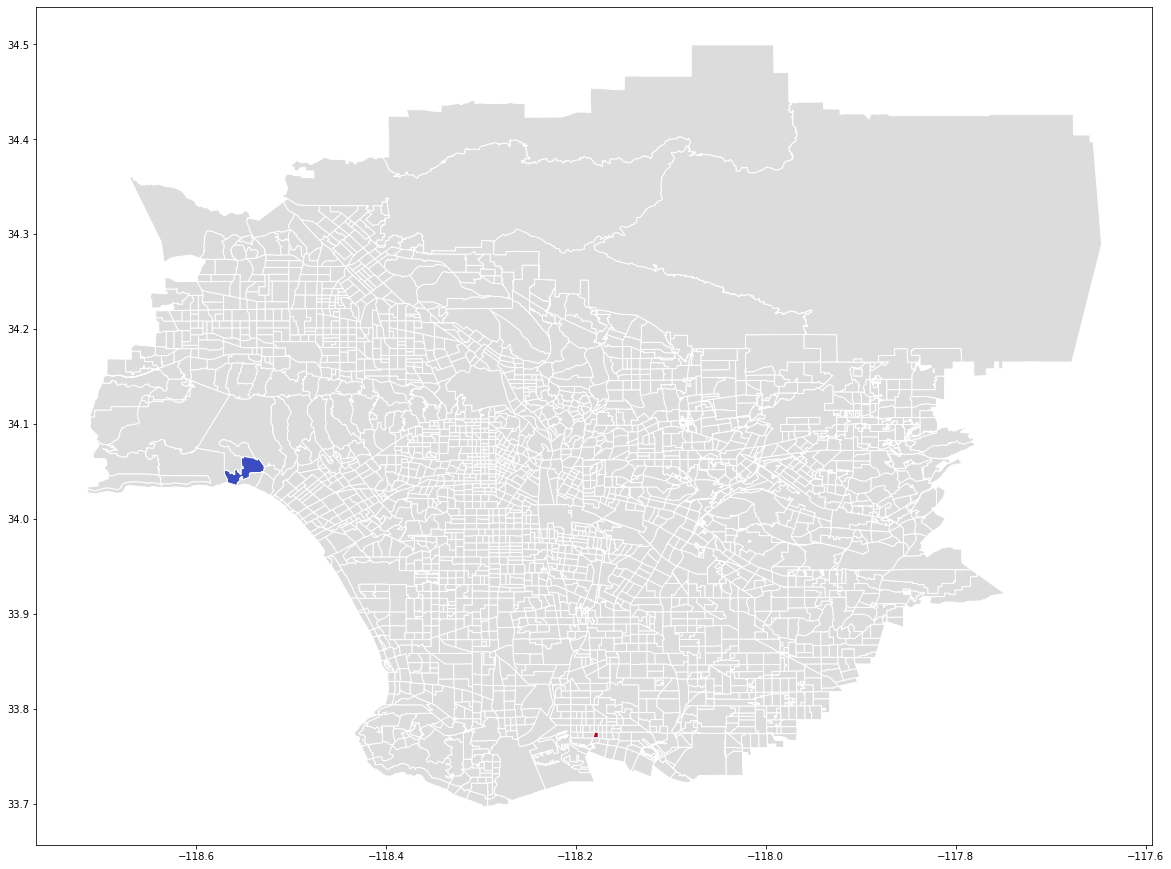

In [5]:
from shapely.geometry import Point
contain_long_beach = geo_df.geometry.contains(Point(-118.18, 33.77))
contain_malibu = geo_df.geometry.contains(Point(-118.56, 34.04))
# You may need to install additional packages (e.g. `geoplot`) to plot.
geo_df.plot(
    column=contain_long_beach + (-1)*contain_malibu,
    figsize=(20,20), categorical=True, cmap="coolwarm", edgecolor="white"
)